In [146]:
import pandas as pd
import numpy as np
import sklearn as sk

#ANSO
clean_df = pd.read_csv("/Users/annesophieriis/Desktop/clean_data.txt",  sep=',', header=0)
#LEA
#df = pd.read_csv("LEA PATH", sep=',', header=0)
#TOSTI
#df = pd.read_csv("TOSTI PATH", sep=',', header=0)


In [147]:
#source for map 
#https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

#pip install plotly

In [148]:
import plotly

import plotly.graph_objs as go

import plotly.offline as offline

from plotly.graph_objs import *

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


,index,date,year,manner_of_death,armed,age,gender,race,city,state,state_ID,signs_of_mental_illness,threat_level,flee,flee_encoded,body_camera,longitude,latitude
0,0,2015-01-02,2015,0,1,53,1,0,Shelton,WA,47,True,attack,Not fleeing,0,False,-123.122,47.247
1,1,2015-01-02,2015,0,1,47,1,5,Aloha,OR,37,False,attack,Not fleeing,0,False,-122.892,45.487
2,2,2015-01-03,2015,1,0,23,1,2,Wichita,KS,16,False,other,Not fleeing,0,False,-97.281,37.695
3,3,2015-01-04,2015,0,1,32,1,5,San Francisco,CA,4,True,attack,Not fleeing,0,False,-122.422,37.763
4,4,2015-01-04,2015,0,1,39,1,2,Evans,CO,5,False,attack,Not fleeing,0,False,-104.692,40.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,5615,2020-09-04,2020,0,1,33,1,1,Syracuse,NY,34,False,other,Not fleeing,0,True,-76.148,43.053
5028,5616,2020-09-04,2020,0,1,38,1,5,Lucerne,CA,4,False,attack,Not fleeing,0,False,-116.832,34.438
5029,5617,2020-09-05,2020,0,1,22,1,5,Battle Creek,MI,22,False,attack,Car,1,False,-85.272,42.305
5030,5618,2020-09-05,2020,0,1,61,1,1,San Antonio,TX,43,False,attack,Not fleeing,0,False,Not fleeing,Not fleeing


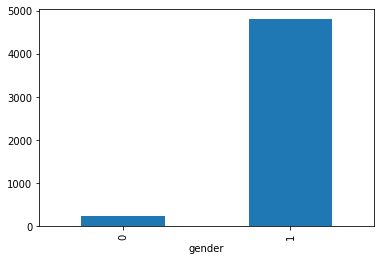

In [149]:
"""

Visualize gender 

"""

gender_df = clean_df['gender']
gender_df
#ax = clean_df.groupby('gender')['index'].sum().plot.bar(grid=True)
ax = clean_df.groupby('gender').size().plot(kind='bar')
clean_df

In [150]:
"""

Creating new df with relevant columns for the map.
Add constant column 'deaths', to summarize later.

"""
map_df = clean_df[['longitude', 'latitude', 'state']]
map_df['deaths'] = 1
map_df

<ipython-input-150-3f888f0687ae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,longitude,latitude,state,deaths
0,-123.122,47.247,WA,1
1,-122.892,45.487,OR,1
2,-97.281,37.695,KS,1
3,-122.422,37.763,CA,1
4,-104.692,40.384,CO,1
...,...,...,...,...
5027,-76.148,43.053,NY,1
5028,-116.832,34.438,CA,1
5029,-85.272,42.305,MI,1
5030,Not fleeing,Not fleeing,TX,1


In [162]:
"""

Create column 'deaths_perState' that groups on 'state' and sums all 'deaths'


"""

map_df['deaths_perState'] = map_df['deaths'].groupby(map_df['state']).transform('sum') 
map_df

<ipython-input-162-faa0c9d6b8bc>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,longitude,latitude,state,deaths,sumofdeaths,deaths_perState
0,-123.122,47.247,WA,1,129,129
1,-122.892,45.487,OR,1,75,75
2,-97.281,37.695,KS,1,49,49
3,-122.422,37.763,CA,1,720,720
4,-104.692,40.384,CO,1,176,176
...,...,...,...,...,...,...
5027,-76.148,43.053,NY,1,92,92
5028,-116.832,34.438,CA,1,720,720
5029,-85.272,42.305,MI,1,76,76
5030,Not fleeing,Not fleeing,TX,1,443,443


In [163]:
"""

Create the data object for plotting need to be a list of dictionaries.

"""

data = [ dict(
            type='choropleth', # type of map-plot
            colorscale = scl,
            autocolorscale = False,
            locations = map_df['state'], # the column with the state
            z = map_df['deaths_perState'].astype(int), # the variable I want to color-code
            locationmode = 'USA-states',
            text = 'Total Fatal US Police Shootings', # hover text
            marker = dict(     # for the lines separating states
                        line = dict (
                                  color = 'rgb(255,255,255)', 
                                  width = 2) ),               
            colorbar = dict(
                        title = "Deaths in USA states")
            ) 
       ]


In [164]:
"""

Then take care of the layout and plot the map.

"""


layout = dict(
       
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),

#              showlakes = True,  # if you want to give color to the lakes

#             lakecolor = 'rgb(73, 216, 230)'  
            ),
             )
fig = dict( data=data, layout=layout )

plotly.offline.iplot(fig)
